<a href="https://colab.research.google.com/github/AbrahamOtero/MLiB/blob/main/4_PredictiveModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predictive models

We import the libraries that we are going to need:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Decission trees

Let us train a decision tree on the iris dataset. For this we can use **DecisionTreeClassifier**. We also have a class called **DecisionTreeRegressor** for regression problems; this class predicts a metric value equal to the average of the target value of all instances falling in each leaf.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/iris.csv'
iris = pd.read_csv(url)

# We separate the features (X_iris) and the class (y_iris)
X_iris = iris.iloc[:, :-1]
y_iris = iris.iloc[:, -1]

# No more than 3 depth levels in the tree (max_depth=3)
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_iris, y_iris)

# Display the tree as text
text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: Virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: Virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Virginica



We can also plot the tree using **export_graphviz**;

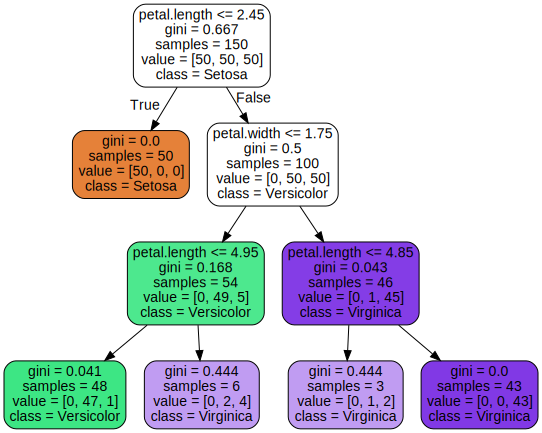

In [3]:
from sklearn.tree import export_graphviz

# We need the names of the feateres and classes
feature_names= X_iris.columns
target_names = y_iris.unique()

#Creates a tectual description of the plot in the iris_tree.dot file
export_graphviz(
        tree_clf,
        out_file=str("iris_tree.dot"),
        feature_names=feature_names,
        class_names=target_names,
        rounded=True,
        filled=True
    )

# The Source class is used to represent and render Graphviz source code.
# It reads the textual description of a graph in the DOT language and renders it as an image
from graphviz import Source

#file expecified in export_graphviz
Source.from_file("iris_tree.dot")

We can use entropy to build the tree by specifying **criterion='entropy'**. As you can see, the results are very similar. The parameters **max_depth=None**, **min_samples_split**, **min_samples_leaf**, **max_leaf_nodes**, and **min_impurity_decrease** (see sklearn documentation) can help us control the complexity of the tree; the more complex the tree, the more likely it is to over-fit the data; while the less complex the tree, the more likely it is to under-fit the data.

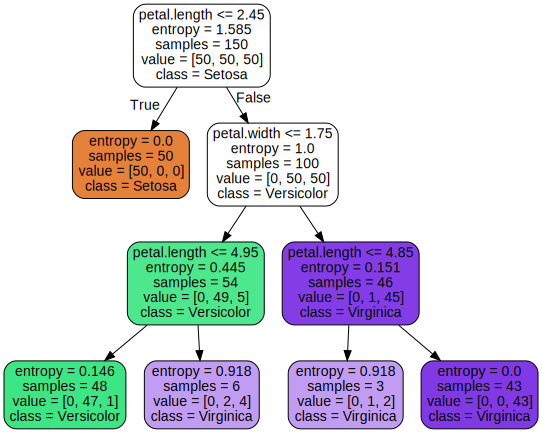

In [4]:
# Use entropy instead of gini (criterion='entropy')
tree_clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
tree_clf.fit(X_iris, y_iris)

export_graphviz(
        tree_clf,
        out_file=str("iris_tree.dot"),
        feature_names=feature_names,
        class_names=target_names,
        rounded=True,
        filled=True
    )

from graphviz import Source

Source.from_file("iris_tree.dot")

Let's now use the tree to make predictions of new instances using **predict** (prdict the class) and **predict_proba** (predict the probability of belonging to each class):

In [5]:
# We predict the class
print('Class:', tree_clf.predict([[5, 1.5, 3, 4.4]]))

# We predict the probability of belonging to each class
print('Probabilities:', tree_clf.predict_proba([[5, 1.5, 3, 4.4]]).round(3))



Class: ['Virginica']
Probabilities: [[0.    0.333 0.667]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


We now calculate the confusion matrix for the entire data set using **confusion_matrix**:

In [6]:
# Needed to compute the confusion matrix
from sklearn.metrics import confusion_matrix

# We predict the class of the hole dataset
y_pred =tree_clf.predict(X_iris)

cm = confusion_matrix(y_iris, y_pred)
print('\n\nConfusion matrix:')
print(cm)



Confusion matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


Let's see for a more complex dataset the implications of building more or less deep trees. We will obtain the moon dataset from sklearn:

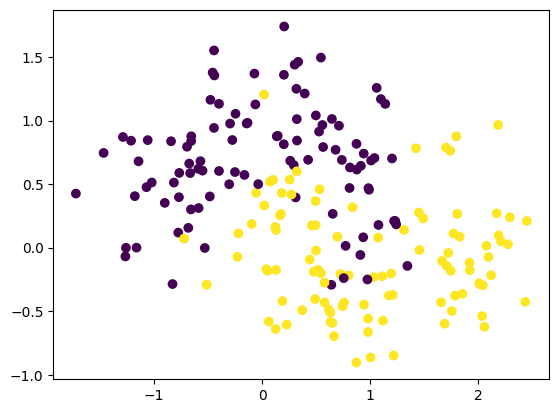

In [7]:
from sklearn.datasets import make_moons

# Geneare the synthetic datset of 200 samples
X_moons, y_moons = make_moons(n_samples=200, noise=0.3, random_state=42)

# Plot the data
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons)
plt.show()

We are going to train trees with a minimum leaf size of 10 and 1. Then we are going to represent the decision boundaries for each tree. It is not too relevant to go into detail about the code that represents the decision boundaries; it is done only for illustrative purposes.

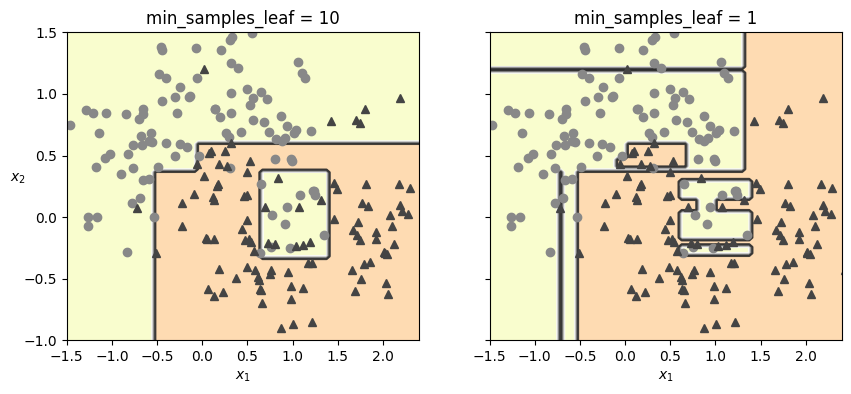

In [8]:
# We train trees with a minimum leaf size of 10 and 1 (min_samples_leaf =10 / =1)
tree_clf1 = DecisionTreeClassifier(min_samples_leaf=10, random_state=33)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=1,random_state=33)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

# Plot the decision boundaries
def plot_decision_boundaries(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#888888", "#444444"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundaries(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf1.min_samples_leaf}")
plt.sca(axes[1])
plot_decision_boundaries(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

The tree that is at a minimum leaf size of 1 is clearly overfitting the data set. The tree that has a minimum leaf size of 10 is a much more reasonable solution.

### Testing the model's performance

To properly measure the performance of the tree we should train on one data set and measure the performance on another. The function **train_test_split** can be used for this:





In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the dataset into 60% training and 40% testing (test_size=0.4)
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.4, random_state=42)

# Training the decision tree on the training data
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Predicting classes for the test set
y_pred = tree_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(cm)

Accuracy: 0.9833333333333333

Confusion matrix:
[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


One of the disadvantages of this strategy is that if we use a different percentage of training and testing samples we can obtain different (ideally only slightly different) solutions:

In [10]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Training the decision tree on the training data
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Predicting classes for the test set
y_pred = tree_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(cm)

Accuracy: 1.0

Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Even if we use the same proportion but sample in a different way (use a different random seed) we could obtain different solutions.

In [11]:
# Split the dataset into 60% training and 40% testing with a different random seed (random_state=412)
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.4, random_state=412)

# Training the decision tree on the training data
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Predicting classes for the test set
y_pred = tree_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(cm)

Accuracy: 0.9333333333333333

Confusion matrix:
[[21  0  0]
 [ 0 22  2]
 [ 0  2 13]]


Cross-validation is a more suitable way to predict performance. We can do this with **cross_val_score** and **cross_val_predict**. cross_val_score evaluates and returns the performance scores of the model on each fold (like accuracy, precision, etc.).
cross_val_predict returns the predicted values for each data point in a cross-validation setting; each prediction is made by a model that has not seen the corresponding data point during training.

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Training the decision tree using 10-fold cross-validation
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
scores = cross_val_score(tree_clf, X_iris, y_iris, cv=10)

# Show the accuracy obtained in each fold
print("Accuracy in each fold:", scores)

# Calculate and display the average accuracy value and standard deviation for the scores of each fold
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

# Predict the labels
y_pred = cross_val_predict(tree_clf, X_iris, y_iris, cv=10)

# Calculate and display the confusion matrix
cm = confusion_matrix(y_iris, y_pred)
print("\nConfusion matrix:")
print(cm)

Accuracy in each fold: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
Mean accuracy: 0.96
Standard deviation: 0.03265986323710903

Confusion matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


Note how the accuracy values ​​obtained in the three different training and validation approaches are within the mean +- 2 standard deviations obtained in the fold validation.

Using **ConfusionMatrixDisplay** we can graphically represent the confusion matrix. This is especially useful when we have a large number of classes.

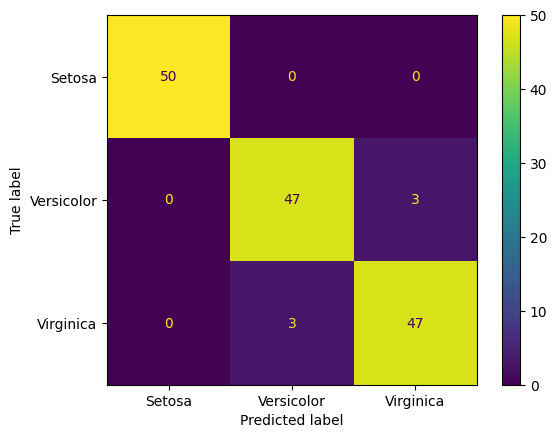

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

# We must pass to from_predictions the real labels and the predicted labels to the method
ConfusionMatrixDisplay.from_predictions(y_iris, y_pred)
plt.show()

Sometimes it is easier to interpret the matrix if we represent it as a percentage.

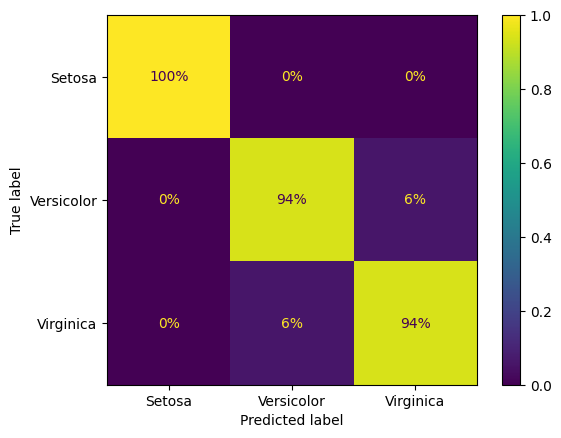

In [14]:
# Show data in percentage normalize="true"

ConfusionMatrixDisplay.from_predictions(y_iris, y_pred,
                                        normalize="true", values_format=".0%")
plt.show()

##SVM

Next, we will train a support vector machine with a linear kernel using **LinearSVC**. We will train it on the diabetes dataset, which is a dataset that has a binary class. It uses soft margin classification, as hard margin is not practical in real world problems.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/diabetes.csv'

diabetes = pd.read_csv(url)

# The featrures
X = diabetes.iloc[:, :-1]
# The class
y = diabetes.iloc[:,-1]

# We normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# dual='auto' avoids the generation of warnings.
# It chooses the algorithm to use for training depending on the size of the data set and the number of features.
svm_clf = LinearSVC(  dual='auto',  random_state=42)

# Use 10 fold cross validation to score
scores =cross_val_score(svm_clf, X, y, cv=10, scoring="accuracy")

# Calculate and display the average accuracy value and standard deviation for the scores of each fold
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Mean accuracy: 0.7734962406015038
Standard deviation: 0.035148448586768515


To use non-linear kernels we must use the **SVC** class. Through the **kernel** parameter we will indicate which one we want to use; the available options are **‘linear’**, **‘poly’**, **‘rbf’**, and **‘sigmoid’** (see SVC documentation).

In [16]:
from sklearn.svm import SVC

# C is a egularization parameter. The strength of the regularization is inversely proportional to C.
#Must be strictly positive. The penalty is a squared l2 penalty
svm_clf = SVC(kernel="rbf", C=1, random_state=42)
# Use 10 fold cross validation to score
scores =cross_val_score(svm_clf, X, y, cv=10, scoring="accuracy")

# Calculate and display the average accuracy value and standard deviation for the scores of each fold
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Mean accuracy: 0.7603896103896104
Standard deviation: 0.03894970515438437


Let us check what happens if we use a small regularization:

In [17]:
# Small regularization; C=0.01
svm_clf = SVC(kernel="rbf", C=0.01, random_state=42)
# Use 10 fold cross validation to score
scores =cross_val_score(svm_clf, X, y, cv=10, scoring="accuracy")

# Calculate and display the average accuracy value and standard deviation for the scores of each fold
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Mean accuracy: 0.6510594668489406
Standard deviation: 0.003417634996582386


The accuracy decreased from 0.75+- 0.06 to 0.65+-0.003. A regulariztion too small lead to overtrainig.

##Naive Bayes

Sklearn does not support Bayesian algorithms that allow processing nominal and metric data together. If we have data sets with both types of attributes, we will have to make the appropriate transformations so that they are all of the same type and we will have to choose the appropriate Predictor for the data se. The Bayesian predictors available are:

*   **BernoulliNB** is designed for binary/boolean features. The may correspond with nominal features with multiple possible values (Color: "black", "green", "red") that had been onehot-encoded (Color_black: "yes", "no"; Color_green: "yes", "no"; Color_red: "yes", "no").
*   **CategoricalNB** is designed for features that are categorically distributed (ordinal features). These features must be represented as integers. You may use **OrdinalEncoder** to transform nominal to this end.
*   **GaussianNB** is designed for metric features.

We will apply Naive Bayes on the iris dataset using **GaussianNB**. This is a categorical (non-metric) dataset and some of the attributes have more than two values.

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Perform 10-fold cross-validation and get accuracy scores
scores = cross_val_score(gnb, X_iris, y_iris, cv=10, scoring='accuracy')

# Print the mean accuracy and standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Mean accuracy: 0.9533333333333334
Standard deviation: 0.04268749491621898


Let us apply **CategoricalNB** over the golf dataset.

In [19]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder

url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/golf.csv'

golf = pd.read_csv(url)

# Create a Gaussian Naive Bayes classifier
gnb = CategoricalNB()

# Prepare the data
X_golf = golf.drop('Play', axis=1)
y_golf = golf['Play']

# Encode the attributes with OrdinalEncoder
X_golf = OrdinalEncoder().fit_transform(X_golf)

gnb.fit(X_golf, y_golf)

# Perform 3-fold cross-validation and get accuracy score
# (we do not have enough data for a 10-fold validation)
scores = cross_val_score(gnb, X_golf, y_golf, cv=3, scoring='accuracy')

# Print the mean accuracy and standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Mean accuracy: 0.65
Standard deviation: 0.07071067811865477


## K Nearest Neighbors

We can apply the K Nearest Neighbors algorithm using the Predictor **NearestNeighbors**:

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Perform 10-fold cross-validation
scores = cross_val_score(knn, X_iris, y_iris, cv=10)

# Print mean and standard deviation of scores
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Mean accuracy: 0.9666666666666668
Standard deviation: 0.04472135954999579


## Multilayer perceptron for classification

Next we will use a 2-layer multilayer perceptron with 30 neurons in each layer to predict the species in the iris dataset. To this end we can use the **MLPClassifier** class:

In [21]:
from sklearn.neural_network import MLPClassifier

# Create MLP classifier with two hidden layers of 30 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=10000, random_state=42)

# Perform 10-fold cross-validation
scores = cross_val_score(mlp, X_iris, y_iris, cv=10)

# Print mean and standard deviation of scores
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Mean accuracy: 0.9800000000000001
Standard deviation: 0.04268749491621898


## Regression



### Linear regression

We will apply linear regression on the Boston house price of the hauses; the goal will be to predict the inhabitants income.

In [22]:
url = 'https://raw.githubusercontent.com/AbrahamOtero/MLiB/main/datasets/housing.csv'

housing = pd.read_csv(url)

# this dataset is all made of metric features
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  class    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


The average income of the house's inhabitants is truncated at $50,000:

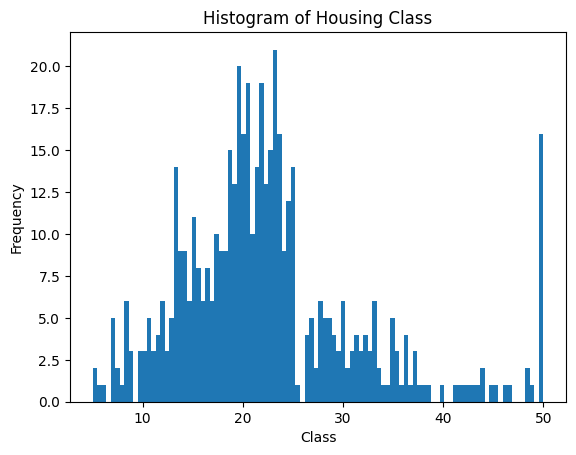

In [23]:
plt.hist(housing['class'], bins=100)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Class')
plt.show()

We will delete the truncated data:

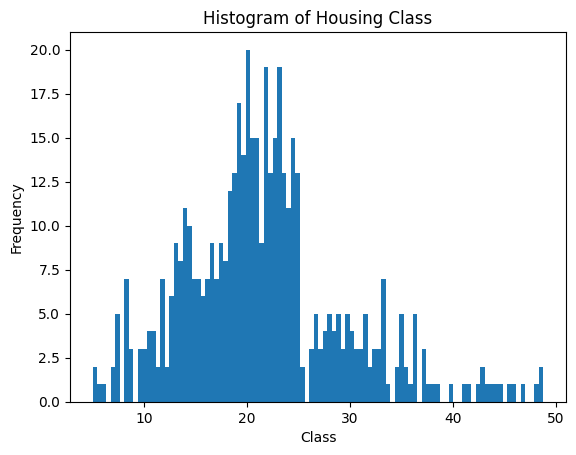

In [24]:
# Remove data from the housing dataset that has a class value greater than 49,999
housing = housing[housing['class'] <= 49.999]

plt.hist(housing['class'], bins=100)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Housing Class')
plt.show()

The predictor **LinearRegression** can be used for linear regression:

RMSE in each fold: [2.7784322  3.25385714 2.83396506 3.79779567 4.54517387 4.83102497
 2.87083758 8.92419449 5.38900915 3.43950624]

Mean RMSE: 4.266379636447395

Standard deviation of the RMSE: 1.7746525272224731


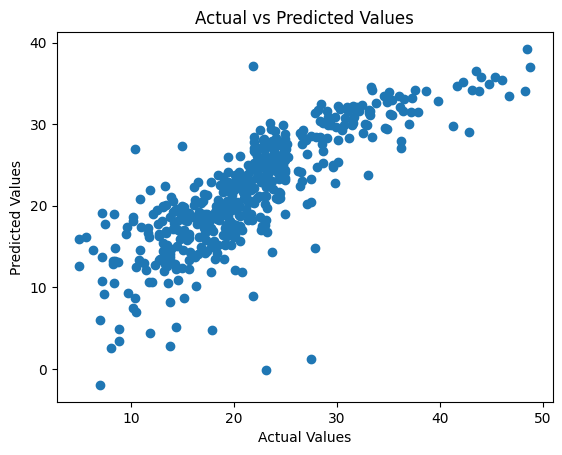

In [25]:
from sklearn.linear_model import LinearRegression

X = housing.drop('class', axis=1)
y = housing['class']

# Create the linear regression model
model = LinearRegression()

# Perform 10-fold cross-validation
# cross_val_score tries to maximize the scoring function; hence the use of the negatime MSE
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# The scores obtained are negative errors (scoring='neg_mean_squared_error'), so we convert them to positive
rmse_scores = np.sqrt(-scores)

# Print the results
print("RMSE in each fold:", rmse_scores)
print("\nMean RMSE:", rmse_scores.mean())
print("\nStandard deviation of the RMSE:", rmse_scores.std())

# Make predictions
y_pred = cross_val_predict(model, X, y, cv=10)

# Plot the actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

### Nonlinear regression

Using **PolynomialFeatures** we can create non-linear features from the original ones and perform linear regression using **LinearRegression**:

RMSE in each fold: [ 3.84584975  2.57137487  7.57582948  5.60247128  6.12073739  4.224376
  4.47002106 18.74033621  6.70868231  7.58613757]

Mean RMSE: 6.7445815925386885

Standard deviation of the RMSE: 4.293431812715369


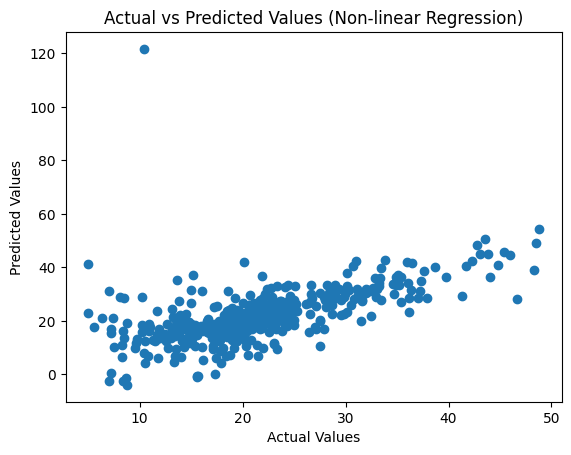

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
degree = 2  # Polynomial degree
poly_features = PolynomialFeatures(degree=degree)

X_nonlinear = poly_features.fit_transform(X)

# Create the non-linear regression model
model = LinearRegression()

# Perform 10-fold cross-validation
scores = cross_val_score(model, X_nonlinear, y, cv=10, scoring='neg_mean_squared_error')

# The scores obtained are negative errors, so we convert them to positive
rmse_scores = np.sqrt(-scores)

# Print the results
print("RMSE in each fold:", rmse_scores)
print("\nMean RMSE:", rmse_scores.mean())
print("\nStandard deviation of the RMSE:", rmse_scores.std())

# Make predictions
y_pred = cross_val_predict(model, X_nonlinear, y, cv=10)

# Plot the actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Non-linear Regression)")
plt.show()

Note that the RMSE increased when using the non linear features; the linear model perfomed better (6.74 +- 4.29 vs 4.27+- 1.78). Probably because of having such a high number of features (with the non-linear transformation there are 105 features) it is likely that there is overfitting; the number of parameters in a linear regression is equal to the number of features, and by using the non-linear features we have gone from 13 to 105. The use of regularization could help with this overfitting.

## Regularized regression
If you are interested in regularized regression models see the documentation for the **Ridge** (L2 regularization), **Lasso** (L1 regularization) and **ElasticNet** (weighted average of L1 and L2) classes. We will start with Ridge. We will apply it on the non-linear features of the Boston dataset.

RMSE in each fold: [ 4.10285678  2.47741251  3.88298483  5.53245545  3.21946911  3.19117562
  2.99748869 13.43452225  7.62702486  5.31442377]

Mean RMSE: 5.1779813862202815

Standard deviation of the RMSE: 3.1141009359082257


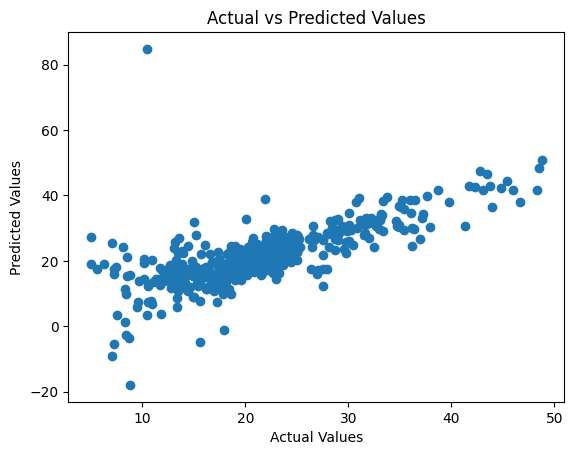

In [27]:
from sklearn.linear_model import Ridge

# Assuming that X_nonlinear and y are already defined from the previous linear regression example

# Create the Ridge regression model;
# aplha is a constant that multiplies the L2 term, controlling regularization strength.
# The default value is 1.0, but in my tests a higher value gives slightly better performance.
model = Ridge(alpha=2, random_state=42)

# Perform 10-fold cross-validation
scores = cross_val_score(model, X_nonlinear, y, cv=10, scoring='neg_mean_squared_error')

# The scores obtained are negative errors (scoring='neg_mean_squared_error'), so we convert them to positive
rmse_scores = np.sqrt(-scores)

# Print the results
print("RMSE in each fold:", rmse_scores)
print("\nMean RMSE:", rmse_scores.mean())
print("\nStandard deviation of the RMSE:", rmse_scores.std())

# Make predictions
y_pred = cross_val_predict(model, X_nonlinear, y, cv=10)

# Plot the actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


Performance improved from 6.74 to 5.18. Let us try with Lasso:

RMSE in each fold: [ 2.91432088  2.82882366  2.65442287  3.63825816  4.08750247  3.58357088
  2.77074612 10.63847813  4.79975208  4.16439113]

Mean RMSE: 4.208026640220799

Standard deviation of the RMSE: 2.24693551436811


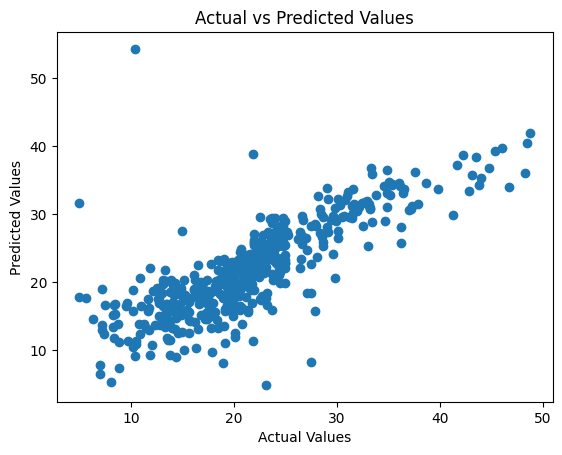

In [28]:
from sklearn.linear_model import Lasso

# Assuming that X_nonlinear and y are already defined from the previous regression example

# Create the Lasso regression model
# tool controls the tolerance of the optimization algorithm;
# warnings may be generated if the tol defaul value is not overridedn
model = Lasso(alpha=0.5, random_state=42, tol=0.1)  # You can adjust the alpha value

# Perform 10-fold cross-validation
scores = cross_val_score(model, X_nonlinear, y, cv=10, scoring='neg_mean_squared_error')

# The scores obtained are negative errors (scoring='neg_mean_squared_error'), so we convert them to positive
rmse_scores = np.sqrt(-scores)

# Print the results
print("RMSE in each fold:", rmse_scores)
print("\nMean RMSE:", rmse_scores.mean())
print("\nStandard deviation of the RMSE:", rmse_scores.std())

# Make predictions
y_pred = cross_val_predict(model, X_nonlinear, y, cv=10)

# Plot the actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

We are now have slightly improved the RMSE of 4.27 that we had obtained for linear regression. And we have improved a lot in non-linear regression. Let us try ElasticNet:

RMSE in each fold: [2.98871006 2.91105509 2.49948535 3.88840604 3.87171661 3.74264486
 2.56476984 8.9735206  4.98510981 3.85688527]

Mean RMSE: 4.028230352780086

Standard deviation of the RMSE: 1.7981640771220109


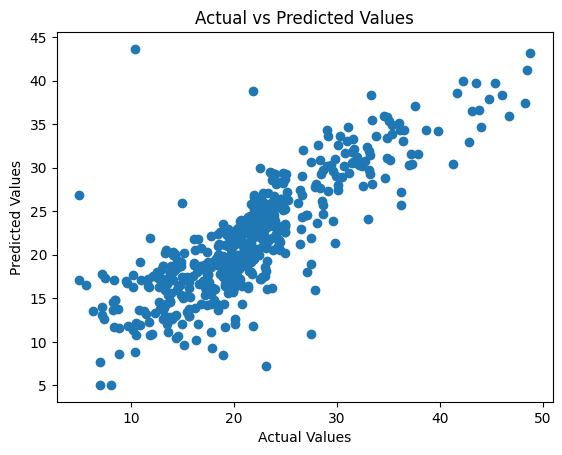

In [29]:
from sklearn.linear_model import ElasticNet

# Assuming that X_nonlinear and y are already defined from the previous regression example

# Create the ElasticNet regression model
# l1_ratio is the mixing parameter. For l1_ratio = 0 the penalty is an L2 penalty.
# For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, tol = 0.1)  # You can adjust alpha and l1_ratio values

# Perform 10-fold cross-validation
scores = cross_val_score(model, X_nonlinear, y, cv=10, scoring='neg_mean_squared_error')

# The scores obtained are negative errors (scoring='neg_mean_squared_error'), so we convert them to positive
rmse_scores = np.sqrt(-scores)

# Print the results
print("RMSE in each fold:", rmse_scores)
print("\nMean RMSE:", rmse_scores.mean())
print("\nStandard deviation of the RMSE:", rmse_scores.std())

# Make predictions
y_pred = cross_val_predict(model, X_nonlinear, y, cv=10)

# Plot the actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

The result slightly improved the previous attempt. However, you should keep in mind that regularized regression does not necessarily give better results than unregularized regression. Initially, I had tried to apply regularized regression on original ("linear") features, but I was unable to improve the standar linear regression results. That is why I have done it on non-linear features, where there is a higher probability of overfitting due to the large number of fature and regularization is more useful. In general, the more features we have, the more likely regularization is to help.

### Multilayer perceptron for regression

It is also possible to use neural networks (perceptron) for regression using the class **MLPRegressor**:

RMSE in each fold: [3.24918065 2.56446744 2.71558164 3.94657405 2.58984327 3.50781655
 2.24868797 5.68022427 3.91921243 3.91805264]

Mean RMSE: 3.433964091149137

Standard deviation of the RMSE: 0.9595508200910312


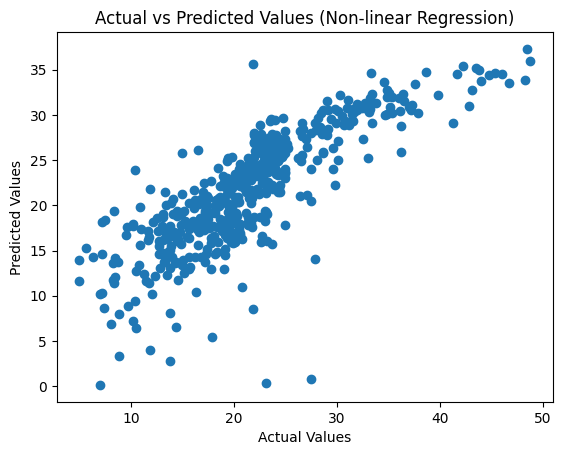

In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler

# Create a Perceptron model with 2 layers each with 30 neurons
perceptron = MLPRegressor(hidden_layer_sizes=[30, 30], max_iter=2000, random_state=42)

# Before applying the perceptron it is a good idea to normalize the features;
# (with linear models this is not relevant (we will get the same result in both cases)
scaler = StandardScaler()
scaler.set_output(transform='pandas')
X = scaler.fit_transform(X)

# Perform 10-fold cross-validation
scores = cross_val_score(perceptron, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)


# Print the results
print("RMSE in each fold:", rmse_scores)
print("\nMean RMSE:", rmse_scores.mean())
print("\nStandard deviation of the RMSE:", rmse_scores.std())

# Make predictions
y_pred = cross_val_predict(model, X, y, cv=10)

# Plot the actual vs predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Non-linear Regression)")
plt.show()

With the neural networks we have managed to improve the performance of linear regression: 3.4+-0.96 vs 4.26+-1.78. In the next chapter we will see how to build deep learning neural networks with the Keras API that are much more powerful than the one we have used here.

# Exercises
## Classification

Load the Iris data. Train a decision tree on the problem using all the data. Campute the accuracy of the model.

In [31]:
# Your code goes here

Load the Iris data. Train a decision tree splitting the data into 70% training and 30% test. Campute the accuracy of the model over the tets data.

In [32]:
# Your code goes here

Repeat the previous exercise using a 10-fold validation.

In [33]:
# Your code goes here

Using 10-fold validation, train a Naive Bayes model on the Iris dataset.

In [34]:
# Your code goes here

Using 10-fold validation, train a KNN model on the Iris dataset.

In [35]:
# Your code goes here

Using 10-fold validation, train a Neural network model on the Iris dataset.

In [36]:
# Your code goes here

Load the wdbc (Diagnostic Wisconsin Breast Cancer Database) dataset. Using 10-fold validation, test several models to see which one performs best at predicting the class.

In [37]:
# Your code goes here

Try to predict whether we should send a patient to the hospital floor, to the intensive care unit, or to home based on the post-operative data. Use a 10-fold validation. Test several models to see which one performs best at predicting the class.

In [38]:
# Your code goes here

## Regresion

Load the Boston house dataset. Train a linear regression to predict house prices by splitting the data into 70% training and 30% validation.

In [39]:
# Your code goes here

Repeat the above exercise, but using a 10-fold regression.

In [40]:
# Your code goes here

Repeat the previous exercise, this time using a neural network.

In [41]:
# Your code goes here

Try to predict the number of rings in the abalone database using different regression techniques. Use 10-fold validation to evaluate.

In [ ]:
# Your code goes here